In [1]:
import emip_toolkit as tk

In [2]:
image_path = "datasets/stimuli/"

In [3]:
image = "rectangle_java2.jpg"

In [4]:
aoi = tk.find_aoi(image, image_path, level="sub-line")
aoi.head()

,kind,name,x,y,width,height,image
0,sub-line,line 1 part 1,589.5,222,63,21,rectangle_java2.jpg
1,sub-line,line 1 part 2,657.5,222,52,21,rectangle_java2.jpg
2,sub-line,line 1 part 3,715.5,222,90,21,rectangle_java2.jpg
3,sub-line,line 1 part 4,813.5,222,10,21,rectangle_java2.jpg
4,sub-line,line 2 part 1,669.5,259,72,21,rectangle_java2.jpg


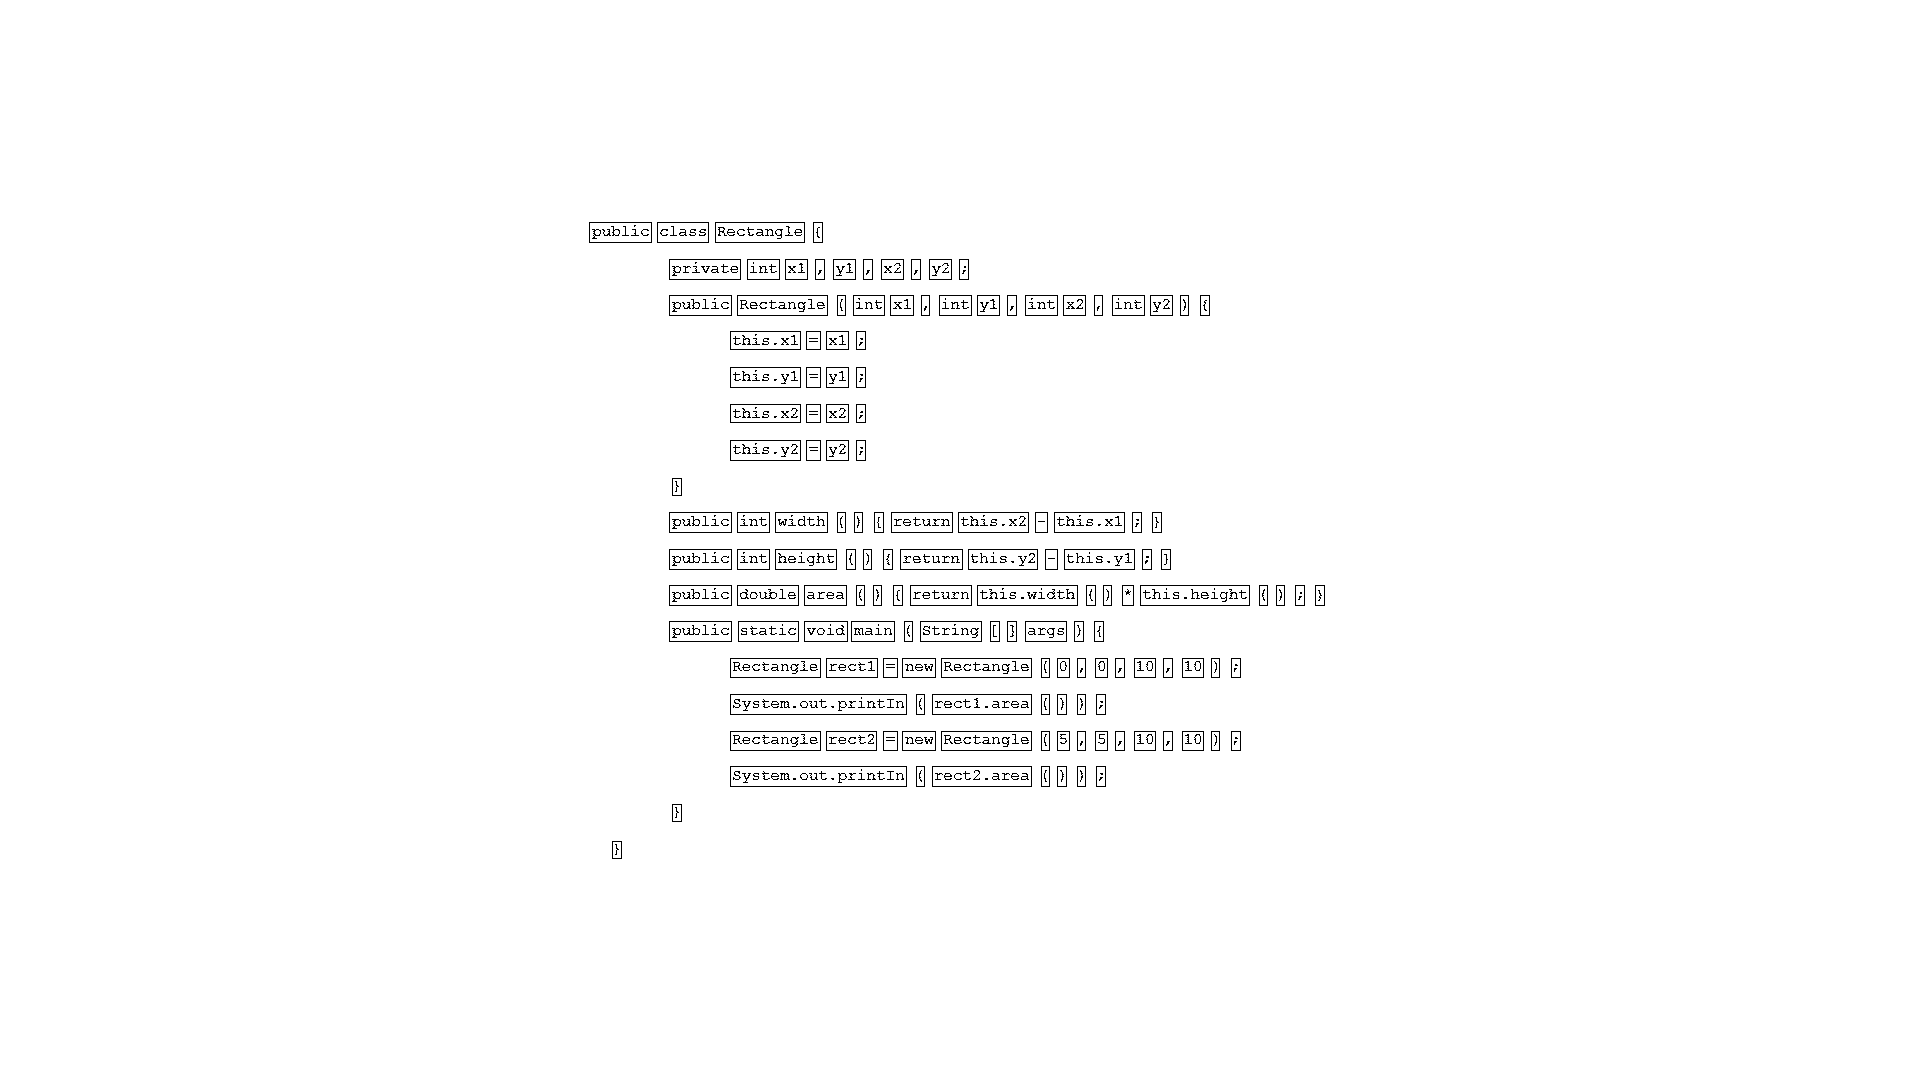

In [5]:
tk.draw_aoi(aoi, image, image_path)

In [6]:
file_path = "datasets/EMIP_DataCollection_Materials/emip_stimulus_programs/"

aois_with_tokens = tk.add_tokens_to_AOIs(file_path, aoi)

aois_with_tokens

,kind,name,x,y,width,height,image,token
0,sub-line,line 1 part 1,589.5,222,63,21,rectangle_java2.jpg,public
1,sub-line,line 1 part 2,657.5,222,52,21,rectangle_java2.jpg,class
2,sub-line,line 1 part 3,715.5,222,90,21,rectangle_java2.jpg,Rectangle
3,sub-line,line 1 part 4,813.5,222,10,21,rectangle_java2.jpg,{
4,sub-line,line 2 part 1,669.5,259,72,21,rectangle_java2.jpg,private
...,...,...,...,...,...,...,...,...
139,sub-line,line 16 part 5,1057.5,766,10,21,rectangle_java2.jpg,)
140,sub-line,line 16 part 6,1077.5,766,9,21,rectangle_java2.jpg,)
141,sub-line,line 16 part 7,1096.5,766,10,21,rectangle_java2.jpg,;
142,sub-line,line 17 part 1,672.5,804,10,18,rectangle_java2.jpg,}


In [7]:
import pandas as pd

In [8]:
# # output to csv
# aois_with_tokens.to_csv('datasets/aois_with_tokens.csv', index=False)

In [9]:
import em_generator as gen

In [23]:
center_x, center_y = gen.rectangle_center(aois_with_tokens["x"], aois_with_tokens["y"], aois_with_tokens["width"], aois_with_tokens["height"])

In [24]:
center_xy = list(zip(center_x, center_y))

In [25]:
center_xy_df = pd.DataFrame(center_xy, columns = ['center_x', 'center_y'])

In [13]:
center_xy_df

,center_x,center_y
0,621.0,232.5
1,683.5,232.5
2,760.5,232.5
3,818.5,232.5
4,705.5,269.5
...,...,...
139,1062.5,776.5
140,1082.0,776.5
141,1101.5,776.5
142,677.5,813.0


In [14]:
# # output to csv
# center_xy_df.to_csv('datasets/centers_of_tokens.csv', index=False)

In [38]:
fixations_df = pd.DataFrame(columns = ['x_cord', 'y_cord', 'token'])

In [39]:
# skip if the length of a token <= 2, with a probability 0.7

for i in range(len(aois_with_tokens)):
    if gen.is_skipped(aois_with_tokens["token"][i], threshold=2, probability=0.7)==False:
        x, y = gen.left_of_rec_center(center_x[i], center_y[i], x_offset=5)
        token = aois_with_tokens["token"][i]
        fixations_df = fixations_df.append({'x_cord': x, 'y_cord': y, 'token': token}, ignore_index=True)

In [40]:
fixations_df

,x_cord,y_cord,token
0,616.0,232.5,public
1,678.5,232.5,class
2,755.5,232.5,Rectangle
3,813.5,232.5,{
4,700.5,269.5,private
...,...,...,...
74,1231.5,741.0,;
75,814.0,776.5,System.out.println
76,977.5,776.5,rect2.area
77,1077.0,776.5,)


In [41]:
# output to csv
fixations_df.to_csv('datasets/fixations.csv', index=False)